# *fast5 file analysis* 

In [ ]:
link from where to downloads https://github.com/nanoporetech/dorado?tab=readme-ov-file
tar -xzvf /home/vaibhavi/Downloads/dorado-0.9.5-linux-x64.tar.gz
cd dorado-0.9.5-linux-x64
/home/vaibhavi/Downloads/dorado-0.9.5-linux-x64/bin/dorado
echo 'export PATH="$HOME/Downloads/dorado-0.9.5-linux-x64/bin:$PATH"' >> ~/.bashrc
source ~/.bashrc
dorado --help
dorado download --model dna_r10.4.1_e8.2_400bps_sup@v4.0.0


In [ ]:
cuda toolkit install

https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&Distribution=Ubuntu&target_version=24.04&target_type=deb_local

wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2404/x86_64/cuda-ubuntu2404.pin
sudo mv cuda-ubuntu2404.pin /etc/apt/preferences.d/cuda-repository-pin-600
wget https://developer.download.nvidia.com/compute/cuda/12.8.1/local_installers/cuda-repo-ubuntu2404-12-8-local_12.8.1-570.124.06-1_amd64.deb
sudo dpkg -i cuda-repo-ubuntu2404-12-8-local_12.8.1-570.124.06-1_amd64.deb
sudo cp /var/cuda-repo-ubuntu2404-12-8-local/cuda-*-keyring.gpg /usr/share/keyrings/
sudo apt-get update
sudo apt-get -y install cuda-toolkit-12-8

driver installer

sudo apt-get install -y nvidia-open
sudo apt-get install -y cuda-drivers


In [ ]:
mkdir ~/Downloads/CI34722_fast5
tar -xzvf ~/Downloads/CI34722_fast5.tar.gz.1 -C ~/Downloads/CI34722_fast5 



mkdir -p ~/Downloads/CI34785_fast5 && tar -xzvf ~/Downloads/CI34785_fast5.tar.gz.1 -C ~/Downloads/CI34785_fast5




In [ ]:
#model download
dorado download --list
dorado download --model dna_r9.4.1_e8_sup@v3.3
dorado download --model dna_r9.4.1_e8_sup@v3.3_5mCG_5hmCG@v0

In [ ]:
# Optional
bwa index Downloads/epi_Lung_cancer/human_reference_genome/Homo_sapiens.GRCh37.75.dna.chromosome.fa


In [ ]:
conda create -n pod5_env python=3.10 -y
conda activate pod5_env
pip install pod5

pip install pod5-tools

In [ ]:
pod5 convert fast5 /home/vaibhavi/Downloads/epi_Lung_cancer/CI34722_fast5/CI34722_fast5 --output /home/vaibhavi/Downloads/epi_Lung_cancer/22.pod5
   

In [ ]:
# basecalling using methyl data without reference genome

dorado basecaller   /home/vaibhavi/Downloads/epi_Lung_cancer/dna_r9.4.1_e8_sup@v3.3   /home/vaibhavi/Downloads/epi_Lung_cancer/22.pod5   --device cpu   --output-dir /home/vaibhavi/Downloads/epi_Lung_cancer/basecalled_output   --modified-bases-models /home/vaibhavi/Downloads/epi_Lung_cancer/dna_r9.4.1_e8_sup@v3.3_5mCG_5hmCG@v0

In [ ]:
dorado summary \
  /home/vaibhavi/Downloads/epi_Lung_cancer/basecalled_output/calls_2025-04-17_T09-15-39.bam \
  > methylation_summary.tsv


In [ ]:
# optional 
modbam2bed \
  --modbase 5mC \
  /path/to/output_dir/output.bam \
  > methylation_5mC.bed


In [ ]:
#with reference genome

dorado basecaller \
/home/vaibhavi/Downloads/epi_Lung_cancer/dna_r9.4.1_e8_sup@v3.3 \
/home/vaibhavi/Downloads/epi_Lung_cancer/22.pod5 \
--device cpu \
--output-dir /home/vaibhavi/Downloads/epi_Lung_cancer/basecalled_output \
--modified-bases-models /home/vaibhavi/Downloads/epi_Lung_cancer/dna_r9.4.1_e8_sup@v3.3_5mCG_5hmCG@v0 \
--reference /home/vaibhavi/Downloads/epi_Lung_cancer/Homo_sapiens.GRCh38.dna.primary_assembly.fa

In [3]:
import pysam

bamfile = pysam.AlignmentFile(
    "./epi_Lung_cancer/basecalled_output/calls_2025-04-17_T09-15-39.bam",
    check_sq=False
)

for read in bamfile.fetch(until_eof=True):
    if read.has_tag("MM"):
        print("✅ Methylation data found!")
        print("MM:", read.get_tag("MM"))
        print("ML:", read.get_tag("ML") if read.has_tag("ML") else "ML tag not present.")
        break
else:
    print("❌ No methylation data found in this BAM file.")


✅ Methylation data found!
MM: C+h?,1,1,21,0,16,1,0,5,0,22,22,22,0,0,51,11,3,0,7,3,2,0,0,0,1,9,1,6,16,10,12,33,6,29,1,4,9,5,8,1,59,3,22,3,3,6,20,0,12,6,19,14,3,3,38,16,19,45,13,17,1,6,2,3,3,3,26,10,12,11;C+m?,1,1,21,0,16,1,0,5,0,22,22,22,0,0,51,11,3,0,7,3,2,0,0,0,1,9,1,6,16,10,12,33,6,29,1,4,9,5,8,1,59,3,22,3,3,6,20,0,12,6,19,14,3,3,38,16,19,45,13,17,1,6,2,3,3,3,26,10,12,11;
ML: array('B', [5, 3, 178, 0, 4, 1, 58, 0, 0, 8, 20, 0, 217, 254, 36, 216, 245, 62, 0, 4, 30, 15, 1, 2, 17, 2, 5, 0, 1, 0, 50, 0, 12, 0, 0, 4, 3, 2, 1, 0, 18, 125, 113, 0, 58, 22, 127, 12, 12, 3, 4, 0, 1, 0, 22, 39, 29, 0, 12, 0, 0, 0, 1, 9, 111, 1, 14, 10, 0, 0, 3, 9, 76, 255, 207, 253, 168, 254, 255, 240, 181, 255, 18, 0, 216, 37, 10, 189, 2, 4, 221, 240, 253, 253, 60, 1, 2, 255, 254, 254, 194, 255, 206, 248, 255, 251, 252, 241, 236, 254, 230, 119, 136, 255, 192, 233, 127, 242, 157, 61, 246, 253, 97, 255, 3, 167, 224, 255, 243, 255, 255, 254, 254, 158, 79, 254, 240, 245, 0, 255])


# methylation data preparation: Extraction of Methylation Information Using Pysam

# sample 22

In [18]:
import pysam

# Open the unaligned Dorado BAM (with methylation tags)
methylation_bam = pysam.AlignmentFile("./epi_Lung_cancer/basecalled_output/calls_2025-04-17_T09-15-39.bam", "rb", check_sq=False)

# Open your aligned SAM or BAM
aligned_bam = pysam.AlignmentFile("./epi_Lung_cancer/output.sam", "r")  # or "rb" if it's a BAM

# Step 1: Extract methylated read IDs
methylated_reads = set()
for read in methylation_bam.fetch(until_eof=True):
    if read.has_tag("MM"):  # methylation annotation present
        methylated_reads.add(read.query_name)

print(f"✅ Found {len(methylated_reads)} methylated reads.")

# Step 2: Match these IDs to the aligned BAM and write their positions
with open("./epi_Lung_cancer/methylated_read_positions.tsv", "w") as out:
    out.write("ReadID\tReference\tPosition\tCIGAR\tMappingQuality\n")
    for read in aligned_bam.fetch(until_eof=True):
        if read.query_name in methylated_reads:
            out.write(f"{read.query_name}\t{read.reference_name}\t{read.reference_start + 1}\t{read.cigarstring}\t{read.mapping_quality}\n")

print("🎯 Results saved in: methylated_read_positions.tsv")


✅ Found 1268 methylated reads.
🎯 Results saved in: methylated_read_positions.tsv


# sample 85

In [1]:
import pysam

# Open the unaligned Dorado BAM (with methylation tags)
methylation_bam = pysam.AlignmentFile("./epi_Lung_cancer/basecalled_output/85_sorted.bam", "rb", check_sq=False)

# Open your aligned SAM or BAM
aligned_bam = pysam.AlignmentFile("/home/vaibhavi/Downloads/epi_Lung_cancer/basecalled_output/85_alig.sam", "r")  # or "rb" if it's a BAM

# Step 1: Extract methylated read IDs
methylated_reads = set()
for read in methylation_bam.fetch(until_eof=True):
    if read.has_tag("MM"):  # methylation annotation present
        methylated_reads.add(read.query_name)

print(f"✅ Found {len(methylated_reads)} methylated reads.")

# Step 2: Match these IDs to the aligned BAM and write their positions
with open("./epi_Lung_cancer/85_methyl_read_posi.tsv", "w") as out:
    out.write("ReadID\tReference\tPosition\tCIGAR\tMappingQuality\n")
    for read in aligned_bam.fetch(until_eof=True):
        if read.query_name in methylated_reads:
            out.write(f"{read.query_name}\t{read.reference_name}\t{read.reference_start + 1}\t{read.cigarstring}\t{read.mapping_quality}\n")

print("🎯 Results saved in: methylated_read_positions.tsv")


✅ Found 853 methylated reads.
🎯 Results saved in: methylated_read_positions.tsv


# sample 22

In [19]:
import pysam
import pandas as pd

# Step 1: Load the methylated reads information
methylated_reads_df = pd.read_csv("methylated_read_positions.tsv", sep="\t")
methylated_reads = set(methylated_reads_df['ReadID'].values)

# Open the BAM file with modified bases (from Dorado basecaller, etc.)
bam_file = pysam.AlignmentFile("./epi_Lung_cancer/basecalled_output/calls_2025-04-17_T09-15-39.bam", "rb", check_sq=False)

# Step 2: Extract methylation data and metadata for matching reads
methylation_data = []
for read in bam_file.fetch(until_eof=True):
    if read.query_name in methylated_reads:
        data = {
            "ReadID": read.query_name,
            "Reference": read.reference_name,
            "Position": read.reference_start + 1,
            "CIGAR": read.cigarstring,
            "MappingQuality": read.mapping_quality,
            "ModifiedBase_MM": read.get_tag('MM') if read.has_tag('MM') else "None",
            "ModificationLikelihood_ML": read.get_tag('ML') if read.has_tag('ML') else "None",
            "QualityScore_qs": read.get_tag('qs') if read.has_tag('qs') else "NA",
            "Duration_du": read.get_tag('du') if read.has_tag('du') else "NA",
            "NumSamples_ns": read.get_tag('ns') if read.has_tag('ns') else "NA",
            "TimeStart_ts": read.get_tag('ts') if read.has_tag('ts') else "NA",
            "Multiplier_mx": read.get_tag('mx') if read.has_tag('mx') else "NA",
            "Channel_ch": read.get_tag('ch') if read.has_tag('ch') else "NA",
            "StartTime_st": read.get_tag('st') if read.has_tag('st') else "NA",
            "ReadNumber_rn": read.get_tag('rn') if read.has_tag('rn') else "NA",
            "FileName_fn": read.get_tag('fn') if read.has_tag('fn') else "NA",
            "SignalMean_sm": read.get_tag('sm') if read.has_tag('sm') else "NA",
            "SignalSD_sd": read.get_tag('sd') if read.has_tag('sd') else "NA",
            "ScalingMethod_sv": read.get_tag('sv') if read.has_tag('sv') else "NA",
            "DriftCorrection_dx": read.get_tag('dx') if read.has_tag('dx') else "NA",
            "ReadGroup_RG": read.get_tag('RG') if read.has_tag('RG') else "NA",
            "MedianEvents_MN": read.get_tag('MN') if read.has_tag('MN') else "NA"
        }
        methylation_data.append(data)

# Convert to DataFrame for easy viewing
methylation_df = pd.DataFrame(methylation_data)

# Save to CSV
methylation_df.to_csv("./epi_Lung_cancer/methylation_positions_and_data.csv", index=False)
print("✅ Methylation + Metadata saved.")


✅ Methylation + Metadata saved.


# sample 85

In [2]:
import pysam
import pandas as pd

# Step 1: Load the methylated reads information
methylated_reads_df = pd.read_csv("./epi_Lung_cancer/85_methyl_read_posi.tsv", sep="\t")
methylated_reads = set(methylated_reads_df['ReadID'].values)

# Open the BAM file with modified bases (from Dorado basecaller, etc.)
bam_file = pysam.AlignmentFile("./epi_Lung_cancer/basecalled_output/85_sorted.bam", "rb", check_sq=False)

# Step 2: Extract methylation data and metadata for matching reads
methylation_data = []
for read in bam_file.fetch(until_eof=True):
    if read.query_name in methylated_reads:
        data = {
            "ReadID": read.query_name,
            "Reference": read.reference_name,
            "Position": read.reference_start + 1,
            "CIGAR": read.cigarstring,
            "MappingQuality": read.mapping_quality,
            "ModifiedBase_MM": read.get_tag('MM') if read.has_tag('MM') else "None",
            "ModificationLikelihood_ML": read.get_tag('ML') if read.has_tag('ML') else "None",
            "QualityScore_qs": read.get_tag('qs') if read.has_tag('qs') else "NA",
            "Duration_du": read.get_tag('du') if read.has_tag('du') else "NA",
            "NumSamples_ns": read.get_tag('ns') if read.has_tag('ns') else "NA",
            "TimeStart_ts": read.get_tag('ts') if read.has_tag('ts') else "NA",
            "Multiplier_mx": read.get_tag('mx') if read.has_tag('mx') else "NA",
            "Channel_ch": read.get_tag('ch') if read.has_tag('ch') else "NA",
            "StartTime_st": read.get_tag('st') if read.has_tag('st') else "NA",
            "ReadNumber_rn": read.get_tag('rn') if read.has_tag('rn') else "NA",
            "FileName_fn": read.get_tag('fn') if read.has_tag('fn') else "NA",
            "SignalMean_sm": read.get_tag('sm') if read.has_tag('sm') else "NA",
            "SignalSD_sd": read.get_tag('sd') if read.has_tag('sd') else "NA",
            "ScalingMethod_sv": read.get_tag('sv') if read.has_tag('sv') else "NA",
            "DriftCorrection_dx": read.get_tag('dx') if read.has_tag('dx') else "NA",
            "ReadGroup_RG": read.get_tag('RG') if read.has_tag('RG') else "NA",
            "MedianEvents_MN": read.get_tag('MN') if read.has_tag('MN') else "NA"
        }
        methylation_data.append(data)

# Convert to DataFrame for easy viewing
methylation_df = pd.DataFrame(methylation_data)

# Save to CSV
methylation_df.to_csv("./epi_Lung_cancer/85_methyl_posi_and_data.csv", index=False)
print("✅ Methylation + Metadata saved.")


✅ Methylation + Metadata saved.


# sample 22

In [20]:
import pandas as pd

# Step 1: Load the methylated reads and positions data
methylated_reads_df = pd.read_csv("methylated_read_positions.tsv", sep="\t")
methylated_data_df = pd.read_csv("methylation_positions_and_data.csv")

# Step 2: Merge the two DataFrames on the 'ReadID' column, suffix to distinguish temporarily
merged_df = pd.merge(
    methylated_data_df,
    methylated_reads_df[['ReadID', 'Reference', 'Position', 'CIGAR', 'MappingQuality']],
    on="ReadID",
    how="left",
    suffixes=('', '_from_positions')
)

# Step 3: Update original columns with the values from methylated_read_positions if available
for column in ['Reference', 'Position', 'CIGAR', 'MappingQuality']:
    merged_df[column] = merged_df[f"{column}_from_positions"].combine_first(merged_df[column])
    merged_df.drop(columns=[f"{column}_from_positions"], inplace=True)

# Step 4: Save the cleaned merged data
merged_df.to_csv("./epi_Lung_cancer/merged_methylation_data.csv", index=False)

print("✅ Merged methylation data saved with unified column names.")


✅ Merged methylation data saved with unified column names.


/tmp/ipykernel_8964/4039281304.py:18: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  merged_df[column] = merged_df[f"{column}_from_positions"].combine_first(merged_df[column])


# sample 85

In [3]:
import pandas as pd

# Step 1: Load the methylated reads and positions data
methylated_reads_df = pd.read_csv("./epi_Lung_cancer/85_methyl_read_posi.tsv", sep="\t")
methylated_data_df = pd.read_csv("./epi_Lung_cancer/85_methyl_posi_and_data.csv")

# Step 2: Merge the two DataFrames on the 'ReadID' column, suffix to distinguish temporarily
merged_df = pd.merge(
    methylated_data_df,
    methylated_reads_df[['ReadID', 'Reference', 'Position', 'CIGAR', 'MappingQuality']],
    on="ReadID",
    how="left",
    suffixes=('', '_from_positions')
)

# Step 3: Update original columns with the values from methylated_read_positions if available
for column in ['Reference', 'Position', 'CIGAR', 'MappingQuality']:
    merged_df[column] = merged_df[f"{column}_from_positions"].combine_first(merged_df[column])
    merged_df.drop(columns=[f"{column}_from_positions"], inplace=True)

# Step 4: Save the cleaned merged data
merged_df.to_csv("./epi_Lung_cancer/85_merged_methylation_data.csv", index=False)

print("✅ Merged methylation data saved with unified column names.")


✅ Merged methylation data saved with unified column names.


In [16]:
pip install pandas numpy matplotlib seaborn scikit-learn biopython


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from pybedtools import BedTool
import os
import subprocess

# Step 1: Load Your Files
methylation_data = pd.read_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/merged_methylation_data.csv')
summary_data = pd.read_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_summary.tsv', sep='\t')

# Step 2: Prepare BED file from methylation data
# Assuming 'Reference' refers to the chromosome and 'Position' is the 1-based position of the methylation site
methylation_bed = methylation_data[['Reference', 'Position']].copy()

# Adjust position to be 0-based for start
methylation_bed['Start'] = methylation_bed['Position'] - 1  # Convert 1-based position to 0-based start
methylation_bed['End'] = methylation_bed['Position']  # End is 1-based, so it's the same as Position for 1-base long region

# Create BED format
methylation_bed = methylation_bed[['Reference', 'Start', 'End']]

# Save to BED file
methylation_bed.to_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_positions.bed', sep='\t', header=False, index=False)

print("BED file prepared and saved.")

# Step 3: Download Gene Annotation GTF (only need to do this once!)
# Example for Ensembl GRCh38:
# wget ftp://ftp.ensembl.org/pub/release-111/gtf/homo_sapiens/Homo_sapiens.GRCh38.111.gtf.gz

# Convert GTF to BED (you can adjust the awk command as needed for more attributes)
# For example, including gene_id and gene_name
os.system("gunzip -c /home/vaibhavi/Downloads/epi_Lung_cancer/Homo_sapiens.GRCh38.111.gtf.gz | "
          "awk '$3==\"gene\" {print $1\"\\t\"$4-1\"\\t\"$5\"\\t\"$10}' > genes.bed")

# Step 4: Map Methylation to Genes
meth_sites = BedTool('/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_positions.bed')
genes = BedTool('genes.bed')

# Intersect methylation calls with genes
annotated = meth_sites.intersect(genes, wa=True, wb=True)

# Convert back to DataFrame
annotated_df = pd.read_csv(annotated.fn, sep='\t', header=None)

# Step 4.1: Fixing column names and possible length mismatch
# Check number of columns and assign appropriate names
if annotated_df.shape[1] == 6:
    annotated_df.columns = ['Chromosome', 'Start', 'End', 'GeneStart', 'GeneEnd', 'GeneName']
elif annotated_df.shape[1] == 7:  # If extra column exists
    annotated_df.columns = ['Chromosome', 'Start', 'End', 'GeneStart', 'GeneEnd', 'GeneName', 'ExtraColumn']
else:
    print("Unexpected number of columns. Please check the file structure.")
    exit()

# Clean GeneName field
annotated_df['GeneName'] = annotated_df['GeneName'].astype(str)
annotated_df['GeneName'] = annotated_df['GeneName'].str.replace('"', '').str.replace(';', '')

# Step 5: Replace GeneName with Position in the summary
# Now replace 'GeneName' with 'Position' for the final count summary
annotated_df['Position'] = annotated_df['Start']  # Using 'Start' as the Position for methylation

# Count Methylation Hits per Position
position_counts = annotated_df['Position'].value_counts().reset_index()
position_counts.columns = ['Position', 'MethylationEventCount']

# Save for reporting
position_counts.to_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_position_summary.csv', index=False)

print("✅ Analysis complete. Results saved to 'methylation_position_summary.csv'.")


BED file prepared and saved.
✅ Analysis complete. Results saved to 'methylation_position_summary.csv'.


# sample 85

In [1]:
import pandas as pd
from pybedtools import BedTool
import os
import subprocess

# Step 1: Load Your Files
methylation_data = pd.read_csv('./epi_Lung_cancer/85_merged_methylation_data.csv')
summary_data = pd.read_csv('./epi_Lung_cancer/85_methylation_summary.tsv', sep='\t')

# Step 2: Prepare BED file from methylation data
# Assuming 'Reference' refers to the chromosome and 'Position' is the 1-based position of the methylation site
methylation_bed = methylation_data[['Reference', 'Position']].copy()

# Adjust position to be 0-based for start
methylation_bed['Start'] = methylation_bed['Position'] - 1  # Convert 1-based position to 0-based start
methylation_bed['End'] = methylation_bed['Position']  # End is 1-based, so it's the same as Position for 1-base long region

# Create BED format
methylation_bed = methylation_bed[['Reference', 'Start', 'End']]

# Save to BED file
methylation_bed.to_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/85_methylation_positions.bed', sep='\t', header=False, index=False)

print("BED file prepared and saved.")

# Step 3: Download Gene Annotation GTF (only need to do this once!)
# Example for Ensembl GRCh38:
# wget ftp://ftp.ensembl.org/pub/release-111/gtf/homo_sapiens/Homo_sapiens.GRCh38.111.gtf.gz

# Convert GTF to BED (you can adjust the awk command as needed for more attributes)
# For example, including gene_id and gene_name
os.system("gunzip -c /home/vaibhavi/Downloads/epi_Lung_cancer/Homo_sapiens.GRCh38.111.gtf.gz | "
          "awk '$3==\"gene\" {print $1\"\\t\"$4-1\"\\t\"$5\"\\t\"$10}' > genes.bed")

# Step 4: Map Methylation to Genes
meth_sites = BedTool('/home/vaibhavi/Downloads/epi_Lung_cancer/85_methylation_positions.bed')
genes = BedTool('genes.bed')

# Intersect methylation calls with genes
annotated = meth_sites.intersect(genes, wa=True, wb=True)

# Convert back to DataFrame
annotated_df = pd.read_csv(annotated.fn, sep='\t', header=None)

# Step 4.1: Fixing column names and possible length mismatch
# Check number of columns and assign appropriate names
if annotated_df.shape[1] == 6:
    annotated_df.columns = ['Chromosome', 'Start', 'End', 'GeneStart', 'GeneEnd', 'GeneName']
elif annotated_df.shape[1] == 7:  # If extra column exists
    annotated_df.columns = ['Chromosome', 'Start', 'End', 'GeneStart', 'GeneEnd', 'GeneName', 'ExtraColumn']
else:
    print("Unexpected number of columns. Please check the file structure.")
    exit()

# Clean GeneName field
annotated_df['GeneName'] = annotated_df['GeneName'].astype(str)
annotated_df['GeneName'] = annotated_df['GeneName'].str.replace('"', '').str.replace(';', '')

# Step 5: Replace GeneName with Position in the summary
# Now replace 'GeneName' with 'Position' for the final count summary
annotated_df['Position'] = annotated_df['Start']  # Using 'Start' as the Position for methylation

# Count Methylation Hits per Position
position_counts = annotated_df['Position'].value_counts().reset_index()
position_counts.columns = ['Position', 'MethylationEventCount']

# Save for reporting
position_counts.to_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/85_methylation_position_summary.csv', index=False)

print("✅ Analysis complete. Results saved to 'methylation_position_summary.csv'.")


BED file prepared and saved.
✅ Analysis complete. Results saved to 'methylation_position_summary.csv'.


In [30]:
!gunzip -c /home/vaibhavi/Downloads/epi_Lung_cancer/Homo_sapiens.GRCh38.111.gtf.gz | \
awk '$3=="gene" { if ($7 == "+") { start = ($4 - 2001 >= 0) ? $4 - 2001 : 0; end = $4 + 100; } else { start = ($5 - 100) >= 0 ? $5 - 100 : 0; end = $5 + 2001; } print $1"\t"start"\t"end"\t"$10 }' > /home/vaibhavi/Downloads/epi_Lung_cancer/promoters.bed


!gunzip -c /home/vaibhavi/Downloads/epi_Lung_cancer/Homo_sapiens.GRCh38.111.gtf.gz | \
awk '$3=="exon" {print $1"\t"$4-1"\t"$5"\t"$10}' > /home/vaibhavi/Downloads/epi_Lung_cancer/exons.bed


In [ ]:
gunzip /home/vaibhavi/Downloads/epi_Lung_cancer/Homo_sapiens.GRCh38.111.gtf.gz                                                          
awk '$3=="gene"{print $1"\t"$4-1"\t"$5"\t"$10}' /home/vaibhavi/Downloads/epi_Lung_cancer/Homo_sapiens.GRCh38.111.gtf > /home/vaibhavi/Downloads/epi_Lung_cancer/genes.bed


In [ ]:
bedtools intersect -a /home/vaibhavi/Downloads/epi_Lung_cancer/methylation_positions.bed -b /home/vaibhavi/Downloads/epi_Lung_cancer/genes.bed -wa -wb > methylation_gene_overlap.tsv


In [3]:
!bedtools intersect -a /home/vaibhavi/Downloads/epi_Lung_cancer/85_methylation_positions.bed -b /home/vaibhavi/Downloads/epi_Lung_cancer/genes.bed -wa -wb > 85_methylation_gene_overlap.tsv


In [4]:
awk '{print $4"\t"($3 - $2)}' /home/vaibhavi/Downloads/epi_Lung_cancer/genes.bed > /home/vaibhavi/Downloads/epi_Lung_cancer/gene_lengths.tsv


SyntaxError: invalid syntax (816585537.py, line 1)

# Annotate Methylation Positions to Genes

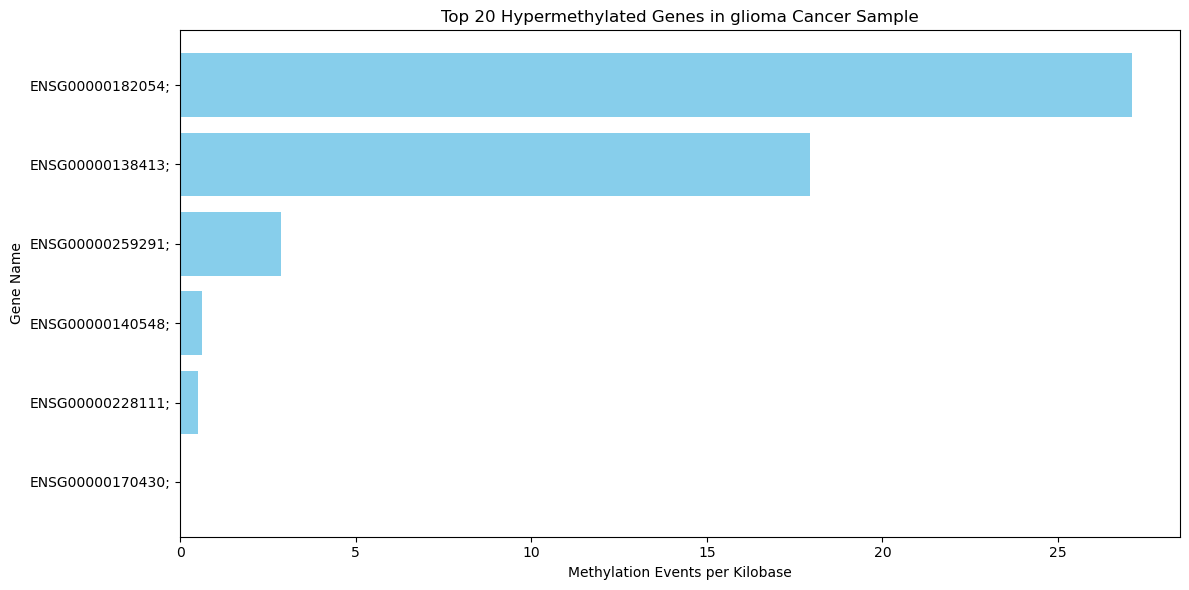

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load methylation-gene overlap data ===
df = pd.read_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_gene_overlap.tsv', sep='\t', header=None)
df.columns = ['Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G', 'GeneName']

# === Step 2: Group positions (first occurrence) ===
positions = df.groupby('GeneName').agg({
    'Chrom_M': 'first',
    'Start_M': 'first',
    'End_M': 'first',
    'Chrom_G': 'first',
    'Start_G': 'first',
    'End_G': 'first'
}).reset_index()

# === Step 3: Count methylation events ===
counts = df['GeneName'].value_counts().reset_index()
counts.columns = ['GeneName', 'Methylation_Count']

# === Step 4: Merge positions and counts ===
summary = pd.merge(positions, counts, on='GeneName', how='inner')

# === Step 5: Load gene lengths ===
gene_lengths = pd.read_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/gene_lengths.tsv', sep='\t', header=None)
gene_lengths.columns = ['GeneName', 'GeneLength']

# === Step 6: Merge all data ===
merged = pd.merge(summary, gene_lengths, on='GeneName', how='inner')

# === Step 7: Normalize by gene length (per kilobase) ===
merged['Methylation_per_kb'] = merged['Methylation_Count'] / (merged['GeneLength'] / 1000)

# === Step 8: Normalize by sequencing depth (per million reads) ===
total_aligned_reads = 5000000  # Replace this with your real count
merged['Normalized_by_Coverage'] = merged['Methylation_per_kb'] / (total_aligned_reads / 1_000_000)

# === Step 9: Identify hypermethylated genes (Top 5%) ===
threshold = merged['Methylation_per_kb'].quantile(0.95)
hypermethylated_genes = merged[merged['Methylation_per_kb'] > threshold]

# === Step 10: Save to file ===
merged.to_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/normalized_methylation_summary.tsv', sep='\t', index=False)
hypermethylated_genes.to_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/hypermethylated_genes.tsv', sep='\t', index=False)

# === Step 11: Plot Top 20 Hypermethylated Genes ===
top20 = merged.sort_values('Methylation_per_kb', ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.barh(top20['GeneName'], top20['Methylation_per_kb'], color='skyblue')
plt.xlabel('Methylation Events per Kilobase')
plt.ylabel('Gene Name')
plt.title('Top 20 Hypermethylated Genes in glioma Cancer Sample')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


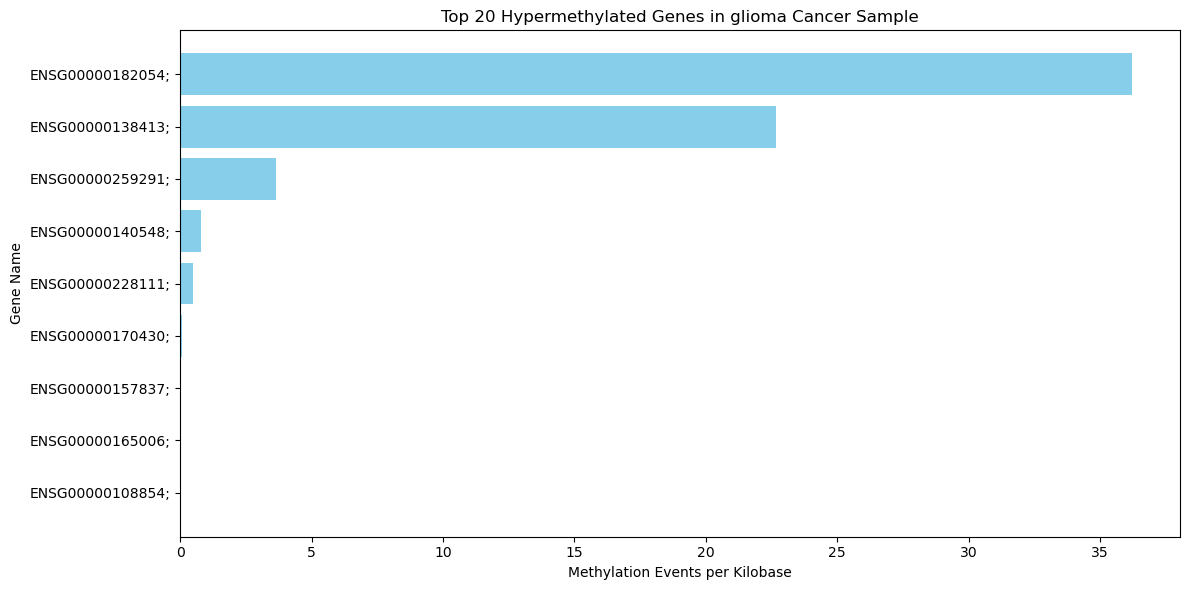

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load methylation-gene overlap data ===
df = pd.read_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/85_methylation_gene_overlap.tsv', sep='\t', header=None)
df.columns = ['Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G', 'GeneName']

# === Step 2: Group positions (first occurrence) ===
positions = df.groupby('GeneName').agg({
    'Chrom_M': 'first',
    'Start_M': 'first',
    'End_M': 'first',
    'Chrom_G': 'first',
    'Start_G': 'first',
    'End_G': 'first'
}).reset_index()

# === Step 3: Count methylation events ===
counts = df['GeneName'].value_counts().reset_index()
counts.columns = ['GeneName', 'Methylation_Count']

# === Step 4: Merge positions and counts ===
summary = pd.merge(positions, counts, on='GeneName', how='inner')

# === Step 5: Load gene lengths ===
gene_lengths = pd.read_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/gene_lengths.tsv', sep='\t', header=None)
gene_lengths.columns = ['GeneName', 'GeneLength']

# === Step 6: Merge all data ===
merged = pd.merge(summary, gene_lengths, on='GeneName', how='inner')

# === Step 7: Normalize by gene length (per kilobase) ===
merged['Methylation_per_kb'] = merged['Methylation_Count'] / (merged['GeneLength'] / 1000)

# === Step 8: Normalize by sequencing depth (per million reads) ===
total_aligned_reads = 5000000  # Replace this with your real count
merged['Normalized_by_Coverage'] = merged['Methylation_per_kb'] / (total_aligned_reads / 1_000_000)

# === Step 9: Identify hypermethylated genes (Top 5%) ===
threshold = merged['Methylation_per_kb'].quantile(0.95)
hypermethylated_genes = merged[merged['Methylation_per_kb'] > threshold]

# === Step 10: Save to file ===
merged.to_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/85_normalized_methylation_summary.tsv', sep='\t', index=False)
hypermethylated_genes.to_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/85_hypermethylated_genes.tsv', sep='\t', index=False)

# === Step 11: Plot Top 20 Hypermethylated Genes ===
top20 = merged.sort_values('Methylation_per_kb', ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.barh(top20['GeneName'], top20['Methylation_per_kb'], color='skyblue')
plt.xlabel('Methylation Events per Kilobase')
plt.ylabel('Gene Name')
plt.title('Top 20 Hypermethylated Genes in glioma Cancer Sample')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# comparing both methylated file 

# python script

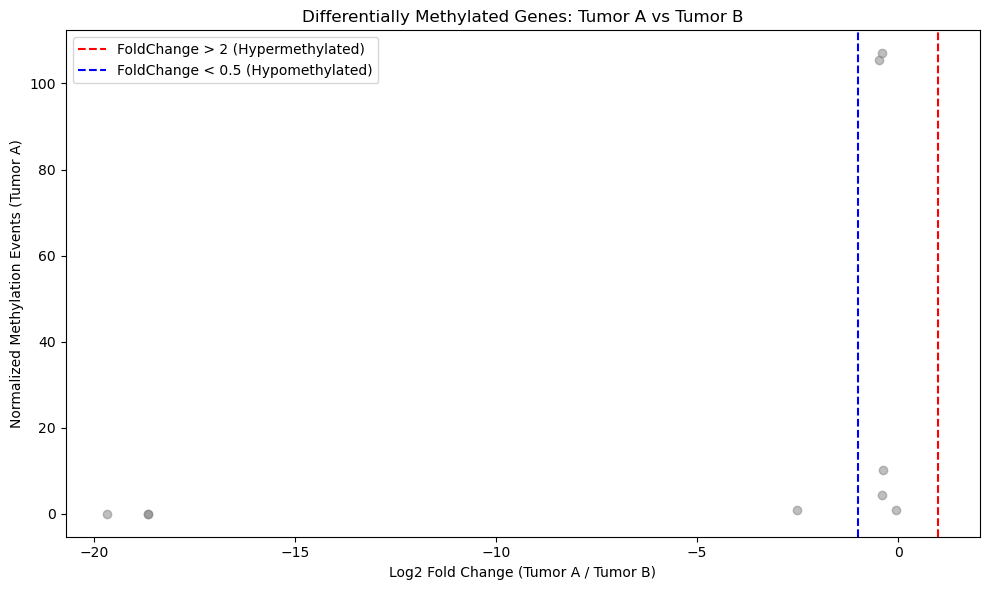

✅ Differential methylation analysis complete.
Results saved at:
- differential_methylation_genes.tsv
- methylation_comparison_summary.tsv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

# === Step 1: Load methylation-gene overlap data ===
df_a = pd.read_csv('/home/vaibhavi/Downloads/Epigenetic_analysis_on_Glioma_cancer/methylation_gene_overlap.tsv', sep='\t', header=None)
df_b = pd.read_csv('/home/vaibhavi/Downloads/Epigenetic_analysis_on_Glioma_cancer/85_methylation_gene_overlap.tsv', sep='\t', header=None)

df_a.columns = ['Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G', 'GeneID']
df_b.columns = ['Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G', 'GeneID']

# === Step 2: Count methylation events per gene ===
counts_a = df_a['GeneID'].value_counts().reset_index()
counts_a.columns = ['GeneID', 'Methylation_Count_A']

counts_b = df_b['GeneID'].value_counts().reset_index()
counts_b.columns = ['GeneID', 'Methylation_Count_B']

# === Step 3: Merge counts ===
merged_counts = pd.merge(counts_a, counts_b, on='GeneID', how='outer').fillna(0)

# === Step 4: Query Ensembl API to map GeneID → GeneName ===
def fetch_gene_names(gene_ids):
    server = "https://rest.ensembl.org"
    ext = "/lookup/id/"
    headers = {"Content-Type": "application/json"}
    gene_name_map = {}
    
    for gene_id in gene_ids:
        cleaned_id = gene_id.strip(";")
        response = requests.get(server + ext + cleaned_id, headers=headers)
        if response.ok:
            gene_name_map[gene_id] = response.json().get('display_name', 'NA')
        else:
            gene_name_map[gene_id] = 'NA'
        time.sleep(0.1)  # Avoid API throttling
    return gene_name_map

unique_gene_ids = merged_counts['GeneID'].unique()
gene_name_dict = fetch_gene_names(unique_gene_ids)

# Map gene names
merged_counts['GeneName'] = merged_counts['GeneID'].map(gene_name_dict)

# === Step 5: Dummy gene lengths — replace with real values ===
merged_counts['GeneLength'] = 1000  # Placeholder

# === Step 6: Normalize methylation counts per kilobase ===
merged_counts['Methylation_per_kb_A'] = merged_counts['Methylation_Count_A'] / (merged_counts['GeneLength'] / 1000)
merged_counts['Methylation_per_kb_B'] = merged_counts['Methylation_Count_B'] / (merged_counts['GeneLength'] / 1000)

# === Step 7: Normalize by sequencing depth ===
total_aligned_reads_A = 5000000
total_aligned_reads_B = 4800000

merged_counts['Norm_by_Coverage_A'] = merged_counts['Methylation_per_kb_A'] / (total_aligned_reads_A / 1_000_000)
merged_counts['Norm_by_Coverage_B'] = merged_counts['Methylation_per_kb_B'] / (total_aligned_reads_B / 1_000_000)

# === Step 8: Calculate fold change ===
merged_counts['Fold_Change'] = (merged_counts['Norm_by_Coverage_A'] + 1e-6) / (merged_counts['Norm_by_Coverage_B'] + 1e-6)

# === Step 9: Classify methylation status ===
merged_counts['Methylation_Status'] = merged_counts['Fold_Change'].apply(
    lambda x: 'Hypermethylated' if x > 2 else ('Hypomethylated' if x < 0.5 else 'Not Significant')
)

# === Step 10: Merge position info back ===
positions_a = df_a.drop_duplicates(subset=['GeneID'])[['GeneID', 'Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G']]
positions_b = df_b.drop_duplicates(subset=['GeneID'])[['GeneID', 'Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G']]

merged_positions = pd.merge(positions_a, positions_b, on='GeneID', how='outer', suffixes=('_A', '_B'))

for col in ['Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G']:
    merged_positions[col] = merged_positions[f'{col}_A'].combine_first(merged_positions[f'{col}_B'])

merged_positions = merged_positions[['GeneID', 'Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G']]

# Merge positions into the main table
merged_counts = pd.merge(merged_counts, merged_positions, on='GeneID', how='left')

# === Step 11: Arrange columns: GeneID, GeneName, Coordinates ===
ordered_columns = [
    'GeneID', 'GeneName',
    'Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G',
    'Methylation_Count_A', 'Methylation_Count_B',
    'GeneLength', 'Methylation_per_kb_A', 'Methylation_per_kb_B',
    'Norm_by_Coverage_A', 'Norm_by_Coverage_B', 'Fold_Change', 'Methylation_Status'
]

merged_counts = merged_counts[ordered_columns]

# Filter differentially methylated genes
dm_genes = merged_counts[merged_counts['Methylation_Status'] != 'Not Significant']

# === Step 12: Save results ===
dm_genes.to_csv('/home/vaibhavi/Downloads/Epigenetic_analysis_on_Glioma_cancer/differential_methylation_genes_.tsv', sep='\t', index=False)
merged_counts.to_csv('/home/vaibhavi/Downloads/Epigenetic_analysis_on_Glioma_cancer/methylation_comparison_summary_.tsv', sep='\t', index=False)

# === Step 13: Plot Volcano-like Fold Change Plot ===
plt.figure(figsize=(10,6))
plt.scatter(np.log2(merged_counts['Fold_Change']), merged_counts['Norm_by_Coverage_A'], alpha=0.5, color='grey')
plt.axvline(np.log2(2), color='red', linestyle='--', label='FoldChange > 2 (Hypermethylated)')
plt.axvline(np.log2(0.5), color='blue', linestyle='--', label='FoldChange < 0.5 (Hypomethylated)')
plt.xlabel('Log2 Fold Change (Tumor A / Tumor B)')
plt.ylabel('Normalized Methylation Events (Tumor A)')
plt.title('Differentially Methylated Genes: Tumor A vs Tumor B')
plt.legend()
plt.tight_layout()
plt.show()

print("✅ Differential methylation analysis complete.\nResults saved at:\n- differential_methylation_genes.tsv\n- methylation_comparison_summary.tsv")


# r script

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)

# === Step 1: Load methylation-gene overlap data ===
df_a <- read.delim('/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_gene_overlap.tsv', header = FALSE)
df_b <- read.delim('/home/vaibhavi/Downloads/epi_Lung_cancer/85_methylation_gene_overlap.tsv', header = FALSE)

colnames(df_a) <- c('Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G', 'GeneID')
colnames(df_b) <- c('Chrom_M', 'Start_M', 'End_M', 'Chrom_G', 'Start_G', 'End_G', 'GeneID')

# === Step 2: Count methylation events per gene ===
counts_a <- df_a %>%
  group_by(GeneID) %>%
  summarise(Methylation_Count_A = n())

counts_b <- df_b %>%
  group_by(GeneID) %>%
  summarise(Methylation_Count_B = n())

# === Step 3: Merge counts ===
merged_counts <- full_join(counts_a, counts_b, by = "GeneID") %>%
  replace_na(list(Methylation_Count_A = 0, Methylation_Count_B = 0))

# === Step 4: Load gene lengths ===
gene_lengths <- read.delim('/home/vaibhavi/Downloads/epi_Lung_cancer/gene_lengths.tsv', header = FALSE)
colnames(gene_lengths) <- c('GeneID', 'GeneLength')

# Merge with gene lengths
merged_counts <- inner_join(merged_counts, gene_lengths, by = "GeneID")

# === Step 5: Normalize methylation counts per kilobase ===
merged_counts <- merged_counts %>%
  mutate(
    Methylation_per_kb_A = Methylation_Count_A / (GeneLength / 1000),
    Methylation_per_kb_B = Methylation_Count_B / (GeneLength / 1000)
  )

# === Step 6: Normalize by sequencing depth ===
total_aligned_reads_A <- 5000000  # Replace with actual number
total_aligned_reads_B <- 4800000  # Replace with actual number

merged_counts <- merged_counts %>%
  mutate(
    Norm_by_Coverage_A = Methylation_per_kb_A / (total_aligned_reads_A / 1e6),
    Norm_by_Coverage_B = Methylation_per_kb_B / (total_aligned_reads_B / 1e6)
  )

# === Step 7: Calculate fold change ===
merged_counts <- merged_counts %>%
  mutate(
    Fold_Change = (Norm_by_Coverage_A + 1e-6) / (Norm_by_Coverage_B + 1e-6)
  )

# === Step 8: Identify hyper- or hypomethylated genes ===
dm_genes <- merged_counts %>%
  filter(Fold_Change > 2 | Fold_Change < 0.5)

# Save the significant genes
write.table(dm_genes, '/home/vaibhavi/Downloads/epi_Lung_cancer/differential_methylation_genes.tsv',
            sep = '\t', row.names = FALSE, quote = FALSE)

# === Step 9: Save full summary ===
write.table(merged_counts, '/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_comparison_summary.tsv',
            sep = '\t', row.names = FALSE, quote = FALSE)

# === Step 10: Plot Volcano-like Fold Change Plot ===
ggplot(merged_counts, aes(x = log2(Fold_Change), y = Norm_by_Coverage_A)) +
  geom_point(alpha = 0.5, color = "grey") +
  geom_vline(xintercept = log2(2), color = "red", linetype = "dashed") +
  geom_vline(xintercept = log2(0.5), color = "blue", linetype = "dashed") +
  labs(
    title = "Differentially Methylated Genes: Sample A vs Sample B",
    x = "Log2 Fold Change (Sample A / Sample B)",
    y = "Normalized Methylation Events (Sample A)"
  ) +
  theme_minimal()

cat("✅ Differential methylation analysis complete.\nResults saved at:\n- differential_methylation_genes.tsv\n- methylation_comparison_summary.tsv\n")


# Optional
# map the methylation positions to human genome features like: Gene promoters Exons Enhancers CpG islands

In [55]:
import pandas as pd

# File paths
files = {
    "methylation_positions": "/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_positions.bed",
    "promoters": "/home/vaibhavi/Downloads/epi_Lung_cancer/promoters.bed",
    "exons": "/home/vaibhavi/Downloads/epi_Lung_cancer/exons.bed",
    "cpg_islands": "/home/vaibhavi/Downloads/epi_Lung_cancer/cpg_islands.bed",
    "enhancers": "/home/vaibhavi/Downloads/epi_Lung_cancer/ENCFF535MKS_6col.bed"
}

# Loop through, print head, save as CSV
for name, path in files.items():
    try:
        df = pd.read_csv(path, sep='\t', header=None)
        print(f"\n===== {name}.bed =====")
        print(df.head())
        # Save as CSV
        df.to_csv(f"/home/vaibhavi/Downloads/epi_Lung_cancer/{name}.csv", index=False)
    except Exception as e:
        print(f"\n⚠️ Error reading {name}: {e}")



===== methylation_positions.bed =====
    0         1         2
0  15  90085100  90085101
1  15  90088539  90088540
2  15  90088538  90088539
3  15  90088558  90088559
4  15  90088539  90088540

===== promoters.bed =====
   0        1        2                 3
0  1   180695   182796  ENSG00000279928;
1  1  2579559  2581660  ENSG00000228037;
2  1  3067167  3069268  ENSG00000142611;
3  1  5307294  5309395  ENSG00000284616;
4  1  2413697  2415798  ENSG00000157911;


/tmp/ipykernel_10231/855053268.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t', header=None)



===== exons.bed =====
   0       1       2                 3
0  1  182695  182746  ENSG00000279928;
1  1  183131  183216  ENSG00000279928;
2  1  183493  183571  ENSG00000279928;
3  1  183739  183901  ENSG00000279928;
4  1  183980  184174  ENSG00000279928;

===== cpg_islands.bed =====
      0          1          2         3
0  chr1  155188536  155192004  CpG:_361
1  chr1    2226773    2229734  CpG:_366
2  chr1   36306229   36307408  CpG:_110
3  chr1   47708822   47710847  CpG:_164
4  chr1   53737729   53739637  CpG:_221

===== enhancers.bed =====
      0       1       2             3  4  5
0  chr1  190865  191071  EH38E1310154  0  .
1  chr1  807736  807916  EH38E1310164  0  .
2  chr1  812113  812266  EH38E1310165  0  .
3  chr1  819893  820227  EH38E1310170  0  .
4  chr1  834366  834554  EH38E1310179  0  .


In [ ]:
pip install pyranges

In [6]:
import pandas as pd
import pyranges as pr

# Load methylation positions
methyl_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_positions.bed", 
                        sep="\t", header=None, names=['Chromosome', 'Start', 'End'])
# Prefix 'chr' to match other files
methyl_df['Chromosome'] = methyl_df['Chromosome'].astype(str).apply(lambda x: 'chr' + x)

# Convert to PyRanges
methyl_ranges = pr.PyRanges(methyl_df)

# Promoters
promoter_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/promoters.bed", 
                          sep="\t", header=None, names=['Chromosome', 'Start', 'End', 'Gene'])
promoter_df['Chromosome'] = promoter_df['Chromosome'].astype(str).apply(lambda x: 'chr' + x)
promoter_ranges = pr.PyRanges(promoter_df)

# Exons
exon_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/exons.bed", 
                      sep="\t", header=None, names=['Chromosome', 'Start', 'End', 'Gene'])
exon_df['Chromosome'] = exon_df['Chromosome'].astype(str).apply(lambda x: 'chr' + x)
exon_ranges = pr.PyRanges(exon_df)

# CpG Islands
cpg_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/cpg_islands.bed", 
                     sep="\t", header=None, names=['Chromosome', 'Start', 'End', 'CpG_Name'])
cpg_ranges = pr.PyRanges(cpg_df)

# Enhancers
enhancer_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/ENCFF535MKS_6col.bed", 
                          sep="\t", header=None, names=['Chromosome', 'Start', 'End', 'Enhancer_ID', 'Score', 'Strand'])
enhancer_ranges = pr.PyRanges(enhancer_df)

# Mapping overlaps
promoter_overlap = methyl_ranges.join(promoter_ranges)
exon_overlap = methyl_ranges.join(exon_ranges)
cpg_overlap = methyl_ranges.join(cpg_ranges)
enhancer_overlap = methyl_ranges.join(enhancer_ranges)

# Save results
promoter_overlap.df.to_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_in_promoters.csv", index=False)
exon_overlap.df.to_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_in_exons.csv", index=False)
cpg_overlap.df.to_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_in_cpg_islands.csv", index=False)
enhancer_overlap.df.to_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_in_enhancers.csv", index=False)

print("✅ Mapping complete! Files saved.")


/tmp/ipykernel_10231/3684534451.py:20: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  exon_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/exons.bed",


✅ Mapping complete! Files saved.



# also count methylation from promoters Exons Enhancers CpG islands

In [10]:
import pandas as pd
import pyranges as pr
import matplotlib.pyplot as plt

# Load methylation positions
methyl_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_positions.bed", 
                        sep="\t", header=None, names=['Chromosome', 'Start', 'End'])
methyl_df['Chromosome'] = methyl_df['Chromosome'].astype(str).apply(lambda x: 'chr' + x)

# Convert to PyRanges
methyl_ranges = pr.PyRanges(methyl_df)

# Promoters
promoter_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/promoters.bed", 
                          sep="\t", header=None, names=['Chromosome', 'Start', 'End', 'Gene'])
promoter_df['Chromosome'] = promoter_df['Chromosome'].astype(str).apply(lambda x: 'chr' + x)
promoter_ranges = pr.PyRanges(promoter_df)

# Exons
exon_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/exons.bed", 
                      sep="\t", header=None, names=['Chromosome', 'Start', 'End', 'Gene'])
exon_df['Chromosome'] = exon_df['Chromosome'].astype(str).apply(lambda x: 'chr' + x)
exon_ranges = pr.PyRanges(exon_df)

# Enhancers
enhancer_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/ENCFF535MKS_6col.bed", 
                          sep="\t", header=None, names=['Chromosome', 'Start', 'End', 'Enhancer_ID', 'Score', 'Strand'])
enhancer_ranges = pr.PyRanges(enhancer_df)

# Mapping overlaps
promoter_overlap = methyl_ranges.join(promoter_ranges)
exon_overlap = methyl_ranges.join(exon_ranges)
enhancer_overlap = methyl_ranges.join(enhancer_ranges)

# Save results
promoter_overlap.df.to_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_in_promoters.csv", index=False)
exon_overlap.df.to_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_in_exons.csv", index=False)
enhancer_overlap.df.to_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/methylation_in_enhancers.csv", index=False)

# --- COUNT METHYLATION EVENTS PER REGION ---

# Promoter count
promoter_counts = promoter_overlap.df['Gene'].value_counts().reset_index()
promoter_counts.columns = ['Gene', 'MethylationEventCount']

# Exon count
exon_counts = exon_overlap.df['Gene'].value_counts().reset_index()
exon_counts.columns = ['Gene', 'MethylationEventCount']

# Enhancer count
enhancer_counts = enhancer_overlap.df['Enhancer_ID'].value_counts().reset_index()
enhancer_counts.columns = ['Enhancer_ID', 'MethylationEventCount']

# Save count summary
promoter_counts.to_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/promoter_methylation_summary.csv", index=False)
exon_counts.to_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/exon_methylation_summary.csv", index=False)
enhancer_counts.to_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/enhancer_methylation_summary.csv", index=False)


/tmp/ipykernel_10231/2371606874.py:20: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  exon_df = pd.read_csv("/home/vaibhavi/Downloads/epi_Lung_cancer/exons.bed",


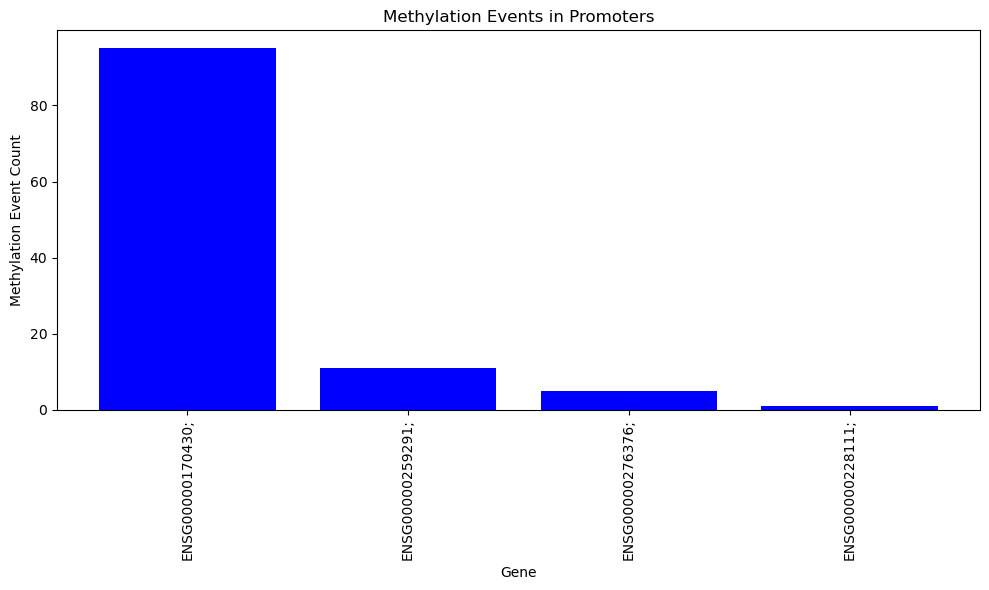

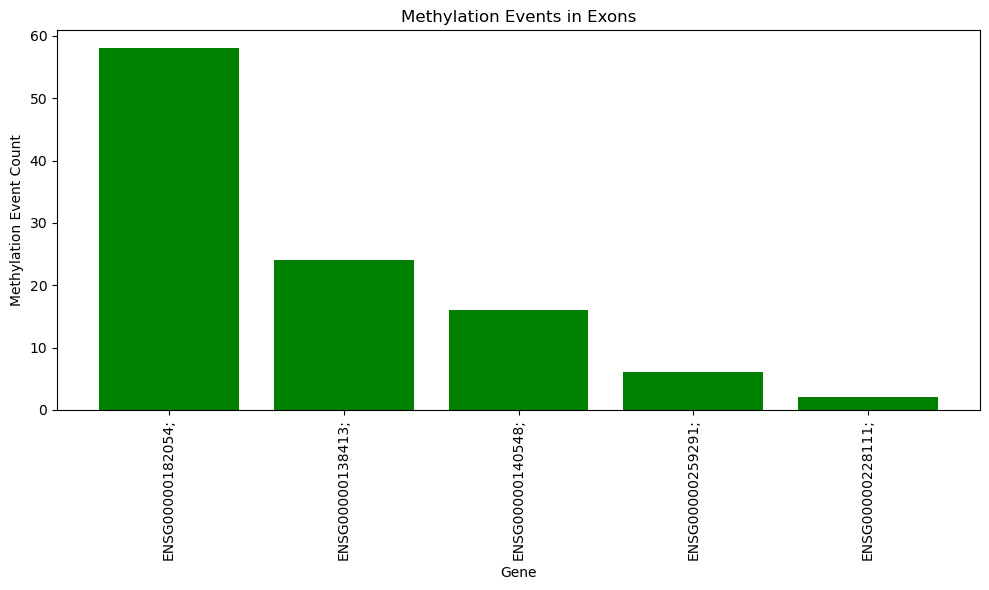

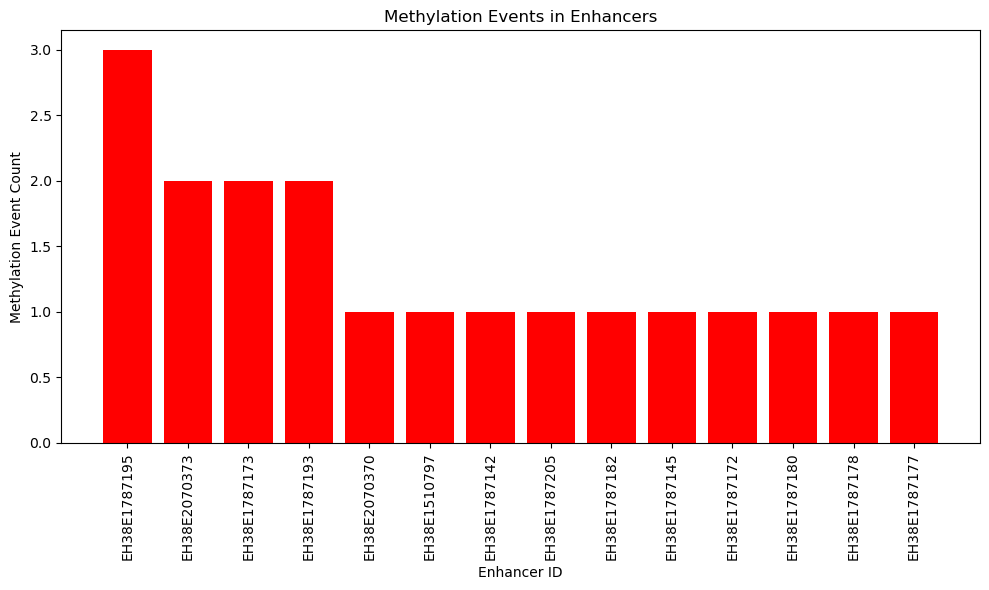

In [11]:
import matplotlib.pyplot as plt

# Plot promoter methylation count
plt.figure(figsize=(10, 6))
plt.bar(promoter_counts['Gene'], promoter_counts['MethylationEventCount'], color='blue')
plt.title('Methylation Events in Promoters')  # Fixed the string issue
plt.xlabel('Gene')
plt.ylabel('Methylation Event Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/home/vaibhavi/Downloads/epi_Lung_cancer/promoter_methylation_bar_chart.png')

# Plot exon methylation count
plt.figure(figsize=(10, 6))
plt.bar(exon_counts['Gene'], exon_counts['MethylationEventCount'], color='green')
plt.title('Methylation Events in Exons')  # Fixed the string issue
plt.xlabel('Gene')
plt.ylabel('Methylation Event Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/home/vaibhavi/Downloads/epi_Lung_cancer/exon_methylation_bar_chart.png')

# Plot enhancer methylation count
plt.figure(figsize=(10, 6))
plt.bar(enhancer_counts['Enhancer_ID'], enhancer_counts['MethylationEventCount'], color='red')
plt.title('Methylation Events in Enhancers')  # Fixed the string issue
plt.xlabel('Enhancer ID')
plt.ylabel('Methylation Event Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/home/vaibhavi/Downloads/epi_Lung_cancer/enhancer_methylation_bar_chart.png')

# Show the plots
plt.show()


# pathways analysis using python


In [ ]:
pip install gprofiler-official pandas

In [2]:
import pandas as pd
from gprofiler import GProfiler

# Load your methylation data
file_path = "/home/vaibhavi/Downloads/epi_Lung_cancer/normalized_methylation_summary.tsv"
df = pd.read_csv(file_path, sep='\t')

# Clean gene names (remove semicolons)
df['GeneName'] = df['GeneName'].str.replace(';', '', regex=False)

# Unique gene list
gene_list = df['GeneName'].unique().tolist()

# Initialize g:Profiler with evidences enabled
gp = GProfiler(return_dataframe=True)

# Run pathway analysis with gene intersections
results = gp.profile(
    organism='hsapiens',
    query=gene_list,
    no_evidences=False  # This returns the matching gene list per pathway
)

# Save the full results to CSV
results.to_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/pathway_enrichment_with_genes.csv', index=False)

print("✅ Enrichment analysis completed with gene names! Results saved to 'pathway_enrichment_with_genes.csv'")


✅ Enrichment analysis completed with gene names! Results saved to 'pathway_enrichment_with_genes.csv'


In [6]:
import pandas as pd
from gprofiler import GProfiler

# Load your methylation data
file_path = "./epi_Lung_cancer/differential_methylation_genes.tsv"
df = pd.read_csv(file_path, sep='\t')

# Clean gene names (remove semicolons)
df['GeneName'] = df['GeneName'].str.replace(';', '', regex=False)

# Unique gene list
gene_list = df['GeneName'].unique().tolist()

# Initialize g:Profiler with evidences enabled
gp = GProfiler(return_dataframe=True)

# Run pathway analysis with gene intersections
results = gp.profile(
    organism='hsapiens',
    query=gene_list,
    no_evidences=False  # This returns the matching gene list per pathway
)

# Save the full results to CSV
results.to_csv('/home/vaibhavi/Downloads/epi_Lung_cancer/combine_22_85_pathway_enrichment_with_genes.csv', index=False)

print("✅ Enrichment analysis completed with gene names! Results saved to 'pathway_enrichment_with_genes.csv'")


✅ Enrichment analysis completed with gene names! Results saved to 'pathway_enrichment_with_genes.csv'


Preview of Significant Pathways with Genes and Precision:
                                                 name   p_value  precision  \
0           isocitrate dehydrogenase (NADP+) activity  0.000007   0.500000   
1                                    glyoxylate cycle  0.000017   0.500000   
2         isocitrate dehydrogenase [NAD(P)+] activity  0.000074   0.500000   
3                                Cytosine methylation  0.000143   0.666667   
4                        isocitrate metabolic process  0.000261   0.500000   
5                           Citrate cycle (TCA cycle)  0.000320   1.000000   
6                     2-Oxocarboxylic acid metabolism  0.000388   1.000000   
7                        glyoxylate metabolic process  0.000487   0.500000   
8                        D-2-hydroxyglutaric aciduria  0.000498   0.666667   
9                              Glutathione metabolism  0.001132   1.000000   
10                Central carbon metabolism in cancer  0.001775   1.000000   
11    

/tmp/ipykernel_3733/1998726260.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


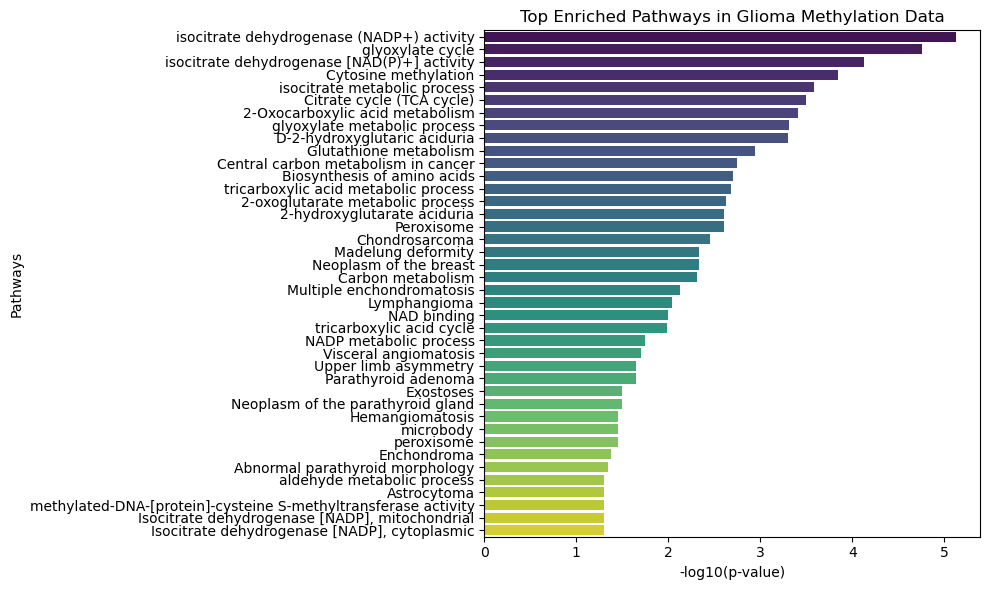

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your data
file_path = '/home/vaibhavi/Downloads/epi_Lung_cancer/pathway_enrichment_with_genes.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Create a new column with -log10(p-value)
df['-log10(p_value)'] = -np.log10(df['p_value'])

# Sort the dataframe based on -log10(p_value)
df_sorted = df.sort_values(by='-log10(p_value)', ascending=False)

# Filter significant pathways (e.g., p-value < 0.05)
significant_df = df_sorted[df_sorted['p_value'] < 0.05]

# Print out a preview of the significant pathways with genes and precision
significant_preview = significant_df[['name', 'p_value', 'precision', 'intersections']]

# Print the preview to the console
print("Preview of Significant Pathways with Genes and Precision:")
print(significant_preview)

# Save the preview to a CSV file
output_file = '/home/vaibhavi/Downloads/epi_Lung_cancer/significant_pathways_preview.csv'  # Change path if needed
significant_preview.to_csv(output_file, index=False)

# Display a message confirming the output file
print(f"Significant pathways preview saved to {output_file}")

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_sorted,
    y='name',  # Pathway name
    x='-log10(p_value)',  # -log10(p-value)
    palette='viridis'
)

# Remove gene annotations (no text added)
plt.xlabel('-log10(p-value)')
plt.ylabel('Pathways')
plt.title('Top Enriched Pathways in Glioma Methylation Data')
plt.tight_layout()
plt.savefig('/home/vaibhavi/Downloads/epi_Lung_cancer/pathway_enrichment_barplot.png')
plt.show()


Preview of Significant Pathways with Genes and Precision:
                                                name   p_value  precision  \
0                             Direct reversal repair  0.029906   0.500000   
1  methylated-DNA-[protein]-cysteine S-methyltran...  0.049764   0.250000   
2                Ubiquitin E3 ligase (SMAD7, SMURF2)  0.049932   1.000000   
3  Ubiquitin E3 ligase (SMURF2, SMAD3) - SnoN com...  0.049932   1.000000   
4                  MGMT-mediated DNA damage reversal  0.049968   0.333333   

  intersections  
0      ['MGMT']  
1      ['MGMT']  
2    ['SMURF2']  
3    ['SMURF2']  
4      ['MGMT']  
Significant pathways preview saved to /home/vaibhavi/Downloads/epi_Lung_cancer/combi_22_85_significant_pathways_preview.csv


/tmp/ipykernel_3664/4147698543.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


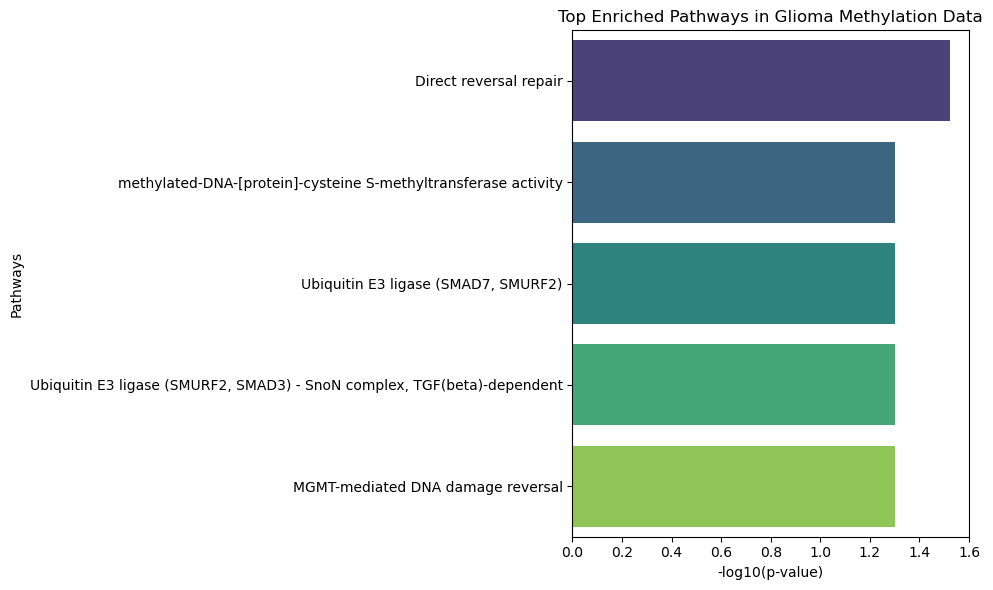

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your data
file_path = '/home/vaibhavi/Downloads/epi_Lung_cancer/combine_22_85_pathway_enrichment_with_genes.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Create a new column with -log10(p-value)
df['-log10(p_value)'] = -np.log10(df['p_value'])

# Sort the dataframe based on -log10(p_value)
df_sorted = df.sort_values(by='-log10(p_value)', ascending=False)

# Filter significant pathways (e.g., p-value < 0.05)
significant_df = df_sorted[df_sorted['p_value'] < 0.05]

# Print out a preview of the significant pathways with genes and precision
significant_preview = significant_df[['name', 'p_value', 'precision', 'intersections']]

# Print the preview to the console
print("Preview of Significant Pathways with Genes and Precision:")
print(significant_preview)

# Save the preview to a CSV file
output_file = '/home/vaibhavi/Downloads/epi_Lung_cancer/combi_22_85_significant_pathways_preview.csv'  # Change path if needed
significant_preview.to_csv(output_file, index=False)

# Display a message confirming the output file
print(f"Significant pathways preview saved to {output_file}")

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_sorted,
    y='name',  # Pathway name
    x='-log10(p_value)',  # -log10(p-value)
    palette='viridis'
)

# Remove gene annotations (no text added)
plt.xlabel('-log10(p-value)')
plt.ylabel('Pathways')
plt.title('Top Enriched Pathways in Glioma Methylation Data')
plt.tight_layout()
plt.savefig('/home/vaibhavi/Downloads/epi_Lung_cancer/combi_22_85_pathway_enrichment_barplot.png')
plt.show()


# Clinical Interpretation Cross-reference genes against databases

In [18]:
import requests

# ClinVar VCF variant download URL
clinvar_url = "https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/clinvar.vcf.gz"
output_file = "clinvar.vcf.gz"

# Download the VCF file
response = requests.get(clinvar_url, stream=True)
with open(output_file, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"Downloaded ClinVar VCF to {output_file}")


Downloaded ClinVar VCF to clinvar.vcf.gz


In [21]:
import pandas as pd

# Skip metadata lines starting with ##
vcf_file = './epi_Lung_cancer/clinvar.vcf'
vcf_data = pd.read_csv(vcf_file, comment='#', sep='\t', header=None)

print(vcf_data.head())


/tmp/ipykernel_4553/903338293.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  vcf_data = pd.read_csv(vcf_file, comment='#', sep='\t', header=None)


   0      1        2   3  4  5  6  \
0  1  66926  3385321  AG  A  .  .   
1  1  69134  2205837   A  G  .  .   
2  1  69314  3205580   T  G  .  .   
3  1  69423  3205581   G  A  .  .   
4  1  69581  2252161   C  G  .  .   

                                                   7  
0  ALLELEID=3544463;CLNDISDB=Human_Phenotype_Onto...  
1  ALLELEID=2193183;CLNDISDB=MedGen:CN169374;CLND...  
2  ALLELEID=3374047;CLNDISDB=MedGen:CN169374;CLND...  
3  ALLELEID=3374048;CLNDISDB=MedGen:CN169374;CLND...  
4  ALLELEID=2238986;CLNDISDB=MedGen:CN169374;CLND...  


In [6]:
!pip install vcfpy


In [17]:
# Compress the VCF file using bgzip
!bgzip ./epi_Lung_cancer/clinvar.vcf

# Index the compressed VCF using tabix
!tabix -p vcf ./epi_Lung_cancer/clinvar.vcf.gz


In [ ]:
tar -tf /home/vaibhavi/Downloads/epi_Lung_cancer/Cosmic_CancerGeneCensus_Tsv_v101_GRCh38.tar


In [8]:
import pandas as pd
import pysam

# Step 1: Load Differential Methylation Genes (from your methylation data file)
methylation_data = pd.read_csv("./epi_Lung_cancer/differential_methylation_genes.tsv", sep="\t")

# Step 2: Load COSMIC Cancer Gene Census Data
cosmic_data = pd.read_csv("./epi_Lung_cancer/Cosmic_CancerGeneCensus_v101_GRCh38.tsv", sep="\t")

# Step 3: Load ClinVar VCF and extract gene-disease associations along with chromosomal positions
def parse_clinvar_vcf(vcf_path):
    gene_to_disease = {}
    gene_to_position = {}  # Will store chr, start, and end positions
    vcf = pysam.VariantFile(vcf_path, "r")
    
    for record in vcf.fetch():
        gene_info = record.info.get('GENEINFO', '')
        clndn = record.info.get('CLNDN', '')
        
        if gene_info and clndn:
            disease_name = clndn[0] if isinstance(clndn, tuple) else clndn
            genes = gene_info.split('|')
            for gene in genes:
                gene_symbol = gene.split(':')[0]
                gene_to_disease[gene_symbol] = disease_name
                # Store chromosomal position info for each gene
                gene_to_position[gene_symbol] = {
                    'Chrom': record.chrom,
                    'Start': record.start,
                    'End': record.stop
                }
    
    return gene_to_disease, gene_to_position

clinvar_genes_diseases, clinvar_genes_positions = parse_clinvar_vcf("./epi_Lung_cancer/clinvar.vcf.gz")

# Step 4: Clean GeneID and GeneName for consistent matching
methylation_data['GeneName'] = methylation_data['GeneName'].str.upper()
cosmic_data['GENE_SYMBOL'] = cosmic_data['GENE_SYMBOL'].str.upper()

# Step 5: Merge the methylation data with COSMIC on GeneName
merged_data = methylation_data.merge(cosmic_data, left_on="GeneName", right_on="GENE_SYMBOL", how="left")

# Step 6: Map disease names from ClinVar to methylation data based on GeneName
merged_data['Disease_Name'] = merged_data['GeneName'].map(clinvar_genes_diseases)

# Step 7: Map chromosomal position from ClinVar to methylation data
merged_data['Chrom_ClinVar'] = merged_data['GeneName'].map(lambda x: clinvar_genes_positions.get(x, {}).get('Chrom', 'NA'))
merged_data['Start_ClinVar'] = merged_data['GeneName'].map(lambda x: clinvar_genes_positions.get(x, {}).get('Start', 'NA'))
merged_data['End_ClinVar'] = merged_data['GeneName'].map(lambda x: clinvar_genes_positions.get(x, {}).get('End', 'NA'))

# Step 8: Mark Cancer Relevance from COSMIC data
merged_data['Is_Cancer_Relevant'] = merged_data['ROLE_IN_CANCER'].notna()

# Step 9: Save the Annotated Methylation Data with ClinVar and COSMIC Information
merged_data.to_csv("./epi_Lung_cancer/annotated_differential_methylation_genes_with_cosmic_clinvar_positions.tsv", sep="\t", index=False)

print("✅ Annotation complete! Saved as: 'annotated_differential_methylation_genes_with_cosmic_clinvar_positions.tsv'")


✅ Annotation complete! Saved as: 'annotated_differential_methylation_genes_with_cosmic_clinvar_positions.tsv'


# Therapeutic target 

In [6]:
pip install requests pandas


Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd

# File paths
dgidb_file = "./epi_Lung_cancer/interactions.tsv"  # DGIdb file path
clinical_file = "./epi_Lung_cancer/annotated_differential_methylation_genes_with_cosmic_clinvar_positions.tsv"  # Clinical file path
output_file = "./epi_Lung_cancer/therapeutic_matches.csv"  # Output file path for matches

# Load DGIdb data
def load_dgidb_data(dgidb_file):
    dgidb_data = pd.read_csv(dgidb_file, sep="\t")
    print(f"DGIdb data loaded: {dgidb_data.shape} rows")
    return dgidb_data

# Load clinical data
def load_clinical_data(clinical_file):
    clinical_data = pd.read_csv(clinical_file, sep="\t")
    print(f"Clinical data loaded: {clinical_data.shape} rows")
    return clinical_data

# Filter therapeutic matches with proper interaction_type handling
def filter_therapeutic_matches(dgidb_data, clinical_data):
    # Merge using gene_name from DGIdb and GENE_SYMBOL from clinical file
    merged = pd.merge(dgidb_data, clinical_data, left_on='gene_name', right_on='GENE_SYMBOL', how='inner')

    # Select relevant columns
    result = merged[['gene_name', 'drug_name', 'interaction_type']]

    # Fill missing interaction_type with 'unknown'
    result['interaction_type'] = result['interaction_type'].fillna('unknown')

    # Drop duplicate gene-drug-interaction entries
    result = result.drop_duplicates(subset=['gene_name', 'drug_name'])

    print(f"Filtered unique therapeutic matches: {result.shape} rows")
    return result

# Save to CSV
def save_to_csv(df, output_file):
    df.to_csv(output_file, index=False)
    print(f"Saved to {output_file}")

# Main function
def main():
    dgidb_data = load_dgidb_data(dgidb_file)
    clinical_data = load_clinical_data(clinical_file)
    therapeutic_matches = filter_therapeutic_matches(dgidb_data, clinical_data)
    save_to_csv(therapeutic_matches, output_file)

if __name__ == "__main__":
    main()


DGIdb data loaded: (98239, 13) rows
Clinical data loaded: (4, 43) rows
Filtered unique therapeutic matches: (1607, 3) rows
Saved to ./epi_Lung_cancer/therapeutic_matches.csv


/tmp/ipykernel_3929/2542241590.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['interaction_type'] = result['interaction_type'].fillna('unknown')
